# 将VGG16卷积基实例化
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
print(conv_base.summary())

# 冻结预训练网络前15层
for layer in conv_base.layers[:15]:
    layer.trainable = False

from keras import models
from keras import layers
from keras.layers import Dropout
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Dropout概率0.5
model.add(layers.Dense(1, activation='sigmoid'))
print(model.summary())

In [5]:
import os
base_dir = 'cat-and-dog'
#构造路径存储训练数据，校验数据
train_dir = os.path.join(base_dir, 'training_set')
validation_dir = os.path.join(base_dir, 'validation_set')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./ 255) 
#把像素点的值除以255，使之在0到1之间
test_datagen = ImageDataGenerator(rescale = 1. / 255)
#generator 实际上是将数据批量读入内存
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150),
                                                   batch_size=20,
                                                    class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size = (150, 150),
                                                       batch_size = 20,
                                                       class_mode = 'binary')

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
model.compile(optimizer=optimizers.RMSprop(lr = 2e-5), 
              loss = 'binary_crossentropy',metrics = ['acc'])
history=model.fit_generator(train_generator, epochs=12,steps_per_epoch = 150,
                    validation_data=validation_generator, 
                            validation_steps=50,verbose=2)

Epoch 1/12
 - 1871s - loss: 0.3889 - acc: 0.8190 - val_loss: 0.2431 - val_acc: 0.8930
Epoch 2/12
 - 1967s - loss: 0.2118 - acc: 0.9137 - val_loss: 0.1864 - val_acc: 0.9210
Epoch 3/12
 - 2033s - loss: 0.1393 - acc: 0.9407 - val_loss: 0.2431 - val_acc: 0.9020
Epoch 4/12
 - 1723s - loss: 0.1025 - acc: 0.9583 - val_loss: 0.1671 - val_acc: 0.9460
Epoch 5/12
 - 1690s - loss: 0.0684 - acc: 0.9780 - val_loss: 0.1570 - val_acc: 0.9540
Epoch 6/12
 - 1695s - loss: 0.0524 - acc: 0.9830 - val_loss: 0.2226 - val_acc: 0.9320
Epoch 7/12
 - 1699s - loss: 0.0331 - acc: 0.9890 - val_loss: 0.2187 - val_acc: 0.9370
Epoch 8/12
 - 1679s - loss: 0.0220 - acc: 0.9913 - val_loss: 0.2081 - val_acc: 0.9440
Epoch 9/12
 - 1675s - loss: 0.0151 - acc: 0.9947 - val_loss: 0.1925 - val_acc: 0.9490
Epoch 10/12
 - 1667s - loss: 0.0199 - acc: 0.9943 - val_loss: 0.2249 - val_acc: 0.9480
Epoch 11/12
 - 1669s - loss: 0.0110 - acc: 0.9967 - val_loss: 0.2709 - val_acc: 0.9400
Epoch 12/12
 - 1663s - loss: 0.0079 - acc: 0.9977 - 

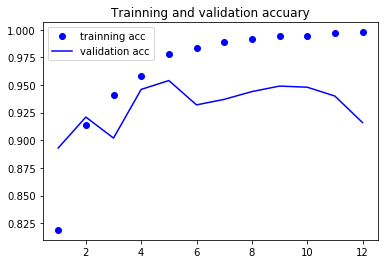

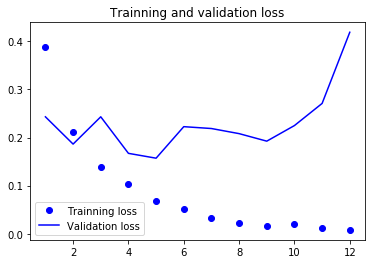

In [8]:
#获取训练结果，如训练数据的准确率，校验数据的准确率等
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#绘制模型对训练数据和校验数据判断的准确率
plt.plot(epochs, acc, 'bo', label = 'trainning acc')
plt.plot(epochs, val_acc, 'b', label = 'validation acc')
plt.title('Trainning and validation accuary')
plt.legend()
plt.show()
plt.figure()
#绘制模型对训练数据和校验数据判断的错误率
plt.plot(epochs, loss, 'bo', label = 'Trainning loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Trainning and validation loss')
plt.legend()
plt.show()